In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [2]:

df = pd.read_excel(
    "/home/elsherif/Desktop/Thesis/ViewPython/data/EV_installations/Ladesaeulenregister_BNetzA_2026-01-12.xlsx",
    header=10   
)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104117 entries, 0 to 104116
Data columns (total 47 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Ladeeinrichtungs-ID                104117 non-null  int64         
 1   Betreiber                          104117 non-null  object        
 2   Anzeigename (Karte)                45504 non-null   object        
 3   Status                             104117 non-null  object        
 4   Art der Ladeeinrichtung            104117 non-null  object        
 5   Anzahl Ladepunkte                  104117 non-null  int64         
 6   Nennleistung Ladeeinrichtung [kW]  104117 non-null  float64       
 7   Inbetriebnahmedatum                104117 non-null  datetime64[ns]
 8   Straße                             104117 non-null  object        
 9   Hausnummer                         104117 non-null  object        
 10  Adresszusatz        

In [3]:
print(df.columns)
df.head()


Index(['Ladeeinrichtungs-ID', 'Betreiber', 'Anzeigename (Karte)', 'Status',
       'Art der Ladeeinrichtung', 'Anzahl Ladepunkte',
       'Nennleistung Ladeeinrichtung [kW]', 'Inbetriebnahmedatum', 'Straße',
       'Hausnummer', 'Adresszusatz', 'Postleitzahl', 'Ort',
       'Kreis/kreisfreie Stadt', 'Bundesland', 'Breitengrad', 'Längengrad',
       'Standortbezeichnung', 'Informationen zum Parkraum', 'Bezahlsysteme',
       'Öffnungszeiten', 'Öffnungszeiten: Wochentage',
       'Öffnungszeiten: Tageszeiten', 'Steckertypen1', 'Nennleistung Stecker1',
       'EVSE-ID1', 'Public Key1', 'Steckertypen2', 'Nennleistung Stecker2',
       'EVSE-ID2', 'Public Key2', 'Steckertypen3', 'Nennleistung Stecker3',
       'EVSE-ID3', 'Public Key3', 'Steckertypen4', 'Nennleistung Stecker4',
       'EVSE-ID4', 'Public Key4', 'Steckertypen5', 'Nennleistung Stecker5',
       'EVSE-ID5', 'Public Key5', 'Steckertypen6', 'Nennleistung Stecker6',
       'EVSE-ID6', 'Public Key6'],
      dtype='object')


,Ladeeinrichtungs-ID,Betreiber,Anzeigename (Karte),Status,Art der Ladeeinrichtung,Anzahl Ladepunkte,Nennleistung Ladeeinrichtung [kW],Inbetriebnahmedatum,Straße,Hausnummer,...,EVSE-ID4,Public Key4,Steckertypen5,Nennleistung Stecker5,EVSE-ID5,Public Key5,Steckertypen6,Nennleistung Stecker6,EVSE-ID6,Public Key6
0,1010338,Albwerk Elektro- und Kommunikationstechnik GmbH,Albwerk Elektro- und Kommunikationstechnik GmbH,In Betrieb,Normalladeeinrichtung,2,22.0,2020-01-11,Am Berg,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1063962,smopi® - Multi Chargepoint Solution GmbH,smopi,In Betrieb,Normalladeeinrichtung,4,22.0,2022-11-23,Albstraße,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1063963,smopi® - Multi Chargepoint Solution GmbH,smopi,In Betrieb,Normalladeeinrichtung,4,22.0,2022-11-23,Albstraße,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1063964,smopi® - Multi Chargepoint Solution GmbH,smopi,In Betrieb,Normalladeeinrichtung,2,22.0,2022-11-23,Albstraße,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1010329,Albwerk Elektro- und Kommunikationstechnik GmbH,Albwerk Elektro- und Kommunikationstechnik GmbH,In Betrieb,Normalladeeinrichtung,2,22.0,2019-01-07,Beim Campingplatz,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[
    [
        "Postleitzahl",
        "Ort",
        "Straße",
        "Inbetriebnahmedatum",
        "Adresszusatz",
        "Anzahl Ladepunkte",
        'Breitengrad',
        'Längengrad',
    ]
]

df.head()


,Postleitzahl,Ort,Straße,Inbetriebnahmedatum,Adresszusatz,Anzahl Ladepunkte,Breitengrad,Längengrad
0,72535,Heroldstatt,Am Berg,2020-01-11,NaN,2,"48,442398","9,659075"
1,72535,Heroldstatt,Albstraße,2022-11-23,NaN,4,"48,449424","9,672201"
2,72535,Heroldstatt,Albstraße,2022-11-23,NaN,4,"48,449424","9,672201"
3,72535,Heroldstatt,Albstraße,2022-11-23,NaN,2,"48,449424","9,672201"
4,72589,Westerheim,Beim Campingplatz,2019-01-07,NaN,2,"48,5105","9,609"


In [5]:
df["Postleitzahl"] = pd.to_numeric(df["Postleitzahl"], errors="coerce")

df_munich = df[
    (df["Postleitzahl"] >= 80331) &
    (df["Postleitzahl"] <= 81929)
]


In [6]:
df_munich[df_munich["Postleitzahl"] == 81375]

,Postleitzahl,Ort,Straße,Inbetriebnahmedatum,Adresszusatz,Anzahl Ladepunkte,Breitengrad,Längengrad
21249,81375,München,Guardinistr.,2017-05-23,NaN,2,"48,117517","11,494929"
21250,81375,München,Stiftsbogen,2020-02-06,NaN,2,"48,118961","11,484453"
21251,81375,München,Stiftsbogen,2020-02-06,NaN,2,"48,119072","11,484483"
21252,81375,München,Würmtalstr.,2022-12-23,NaN,2,"48,115139","11,48057"
21253,81375,München,Großhaderner Straße,2022-10-05,NaN,3,"48,120528","11,481722"
21254,81375,München,Mäuselweg,2024-01-01,NaN,1,"48,115437","11,479145"
21255,81375,München - Neufriedenheim,Stiftsbogen,2020-09-17,NaN,2,"48,122887","11,490788"


In [7]:
df_dataset = pd.read_csv("/home/elsherif/Desktop/Thesis/ViewPython/data/CleanupDataSet/final_model.csv")
df_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12479 entries, 0 to 12478
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tile                         12479 non-null  object 
 1   total_rooftops               12479 non-null  int64  
 2   rooftops_without_solar       12479 non-null  int64  
 3   square_meters_with_solar_m2  12479 non-null  float64
 4   panel_area_m2                12479 non-null  float64
 5   tile_centroid_lat            12479 non-null  float64
 6   tile_centroid_lon            12479 non-null  float64
 7   district_number              12479 non-null  int64  
 8   year                         12479 non-null  int64  
 9   Unemployment_Rate            12479 non-null  float64
 10  Average_Age                  12479 non-null  float64
 11  Elderly_Population           12479 non-null  float64
 12  Young_Population             12479 non-null  float64
 13  Total_Population

In [8]:

# Fix decimal comma → dot
df_munich["Breitengrad"] = (
    df_munich["Breitengrad"]
    .str.replace(",", ".", regex=False)
    .astype(float)
)

df_munich["Längengrad"] = (
    df_munich["Längengrad"]
    .str.replace(",", ".", regex=False)
    .astype(float)
)


/tmp/ipykernel_321769/2923415938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_munich["Breitengrad"] = (
/tmp/ipykernel_321769/2923415938.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_munich["Längengrad"] = (


In [9]:
df_munich["install_year"] = pd.to_datetime(
    df_munich["Inbetriebnahmedatum"]
).dt.year


/tmp/ipykernel_321769/4012303562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_munich["install_year"] = pd.to_datetime(


In [10]:
from sklearn.neighbors import BallTree
import numpy as np

# --- Ensure install_year is correct ---
df_munich["install_year"] = pd.to_datetime(
    df_munich["Inbetriebnahmedatum"]
).dt.year.astype(int)

# --- Build BallTree AFTER finalizing EV data ---
ev_coords = np.radians(df_munich[["Breitengrad", "Längengrad"]].values)
tree = BallTree(ev_coords, metric="haversine")

# --- Tile coordinates in radians ---
tile_coords = np.radians(df_dataset[["tile_centroid_lat", "tile_centroid_lon"]].values)

# --- Radius conversion ---
radius_m = 164.5
earth_radius = 6371000
radius_rad = radius_m / earth_radius

# --- Query neighbors (returns list of arrays of indices) ---
indices = tree.query_radius(tile_coords, r=radius_rad)

# --- Compute EV counts and points for each tile-year ---
ev_counts = []
ev_points_sum = []

for i, neighbors in enumerate(indices):
    tile_year = int(df_dataset.iloc[i]["year"])
    
    # Nearby EVs
    ev_subset = df_munich.iloc[neighbors]
    
    # Filter by year
    ev_subset = ev_subset[ev_subset["install_year"] <= tile_year]
    
    # Append results
    ev_counts.append(len(ev_subset))
    ev_points_sum.append(ev_subset["Anzahl Ladepunkte"].sum() if len(ev_subset) > 0 else 0)

# --- Add new columns ---
df_dataset["ev_count_164m"] = ev_counts
df_dataset["ev_points_164m"] = ev_points_sum


/tmp/ipykernel_321769/2878171544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_munich["install_year"] = pd.to_datetime(


In [11]:
df_dataset

,tile,total_rooftops,rooftops_without_solar,square_meters_with_solar_m2,panel_area_m2,tile_centroid_lat,tile_centroid_lon,district_number,year,Unemployment_Rate,Average_Age,Elderly_Population,Young_Population,Total_Population,employed,tile_encoded,panel_area_lag1,pv_price,ev_count_164m,ev_points_164m
0,tile_r0_c0,7,7,0.000,0.000,48.111706,11.444507,20,2006,5.7,42.6,9505.0,7243.0,44993,65.6,0,14.890,5440.0,0,0
1,tile_r0_c0,7,6,158.590,1.170,48.111706,11.444507,20,2009,4.6,42.7,10286.0,7240.0,46490,64.9,0,0.000,3800.0,0,0
2,tile_r0_c0,7,5,529.887,101.361,48.111706,11.444507,20,2012,3.8,42.9,10627.0,7361.0,47949,64.9,0,1.170,2150.0,0,0
3,tile_r0_c0,6,5,156.775,4.786,48.111706,11.444507,20,2015,3.5,42.9,10953.0,7588.0,50257,65.5,0,101.361,1550.0,0,0
4,tile_r0_c0,7,6,157.732,102.425,48.111706,11.444507,20,2018,2.6,43.2,10913.0,7429.0,49898,65.7,0,4.786,1350.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12474,tile_r9_c9,125,113,4051.710,189.448,48.138690,11.484931,21,2012,3.2,42.2,13608.0,11579.0,69295,66.2,1563,341.494,2150.0,0,0
12475,tile_r9_c9,127,117,4095.074,300.374,48.138690,11.484931,21,2018,2.7,42.4,14366.0,12638.0,74625,66.4,1563,189.448,1350.0,0,0
12476,tile_r9_c9,132,125,2251.183,173.403,48.138690,11.484931,21,2020,3.8,42.3,14631.0,13257.0,77301,66.5,1563,300.374,1280.0,0,0
12477,tile_r9_c9,124,110,4882.512,301.224,48.138690,11.484931,21,2022,3.2,41.9,14852.0,14062.0,80309,66.6,1563,173.403,1550.0,0,0


In [19]:
# indices is a list of arrays (one per tile)
all_matched_indices = np.concatenate(indices) if len(indices) > 0 else np.array([], dtype=int)
all_matched_indices = np.unique(all_matched_indices)  # remove duplicates


In [21]:
# Create a boolean mask of all rows
mask = np.ones(len(df_munich), dtype=bool)

# Mark matched rows as False
mask[all_matched_indices] = False

# Select unmatched rows
unmatched_ev = df_munich[mask]

print(f"Number of unmatched EVs: {len(unmatched_ev)}")


Number of unmatched EVs: 1094


In [12]:
# Tiles with at least one EV station
matched_tiles = df_dataset[df_dataset["ev_count_164m"] > 0]
num_matched_tiles = len(matched_tiles)

print(f"Number of tiles with at least one EV: {num_matched_tiles}")


Number of tiles with at least one EV: 926


In [13]:
# Top 10 tiles by station count
top_tiles_stations = df_dataset.sort_values(
    "ev_count_164m", ascending=False
).head(10)[["tile", "ev_count_164m"]]

print(top_tiles_stations)


               tile  ev_count_164m
3798   tile_r25_c22            122
3797   tile_r25_c22            122
10990   tile_r55_c8             59
10989   tile_r55_c8             59
3796   tile_r25_c22             42
4445   tile_r28_c22             31
4446   tile_r28_c22             31
4526    tile_r28_c8             27
7534    tile_r40_c6             26
7533    tile_r40_c6             26


In [14]:
# Top 10 tiles by charging points
top_tiles_points = df_dataset.sort_values(
    "ev_points_164m", ascending=False
).head(10)[["tile", "ev_points_164m"]]

print(top_tiles_points)


               tile  ev_points_164m
3798   tile_r25_c22             125
3797   tile_r25_c22             125
10990   tile_r55_c8              59
10989   tile_r55_c8              59
3796   tile_r25_c22              45
6957   tile_r39_c13              40
6958   tile_r39_c13              40
2838   tile_r21_c11              40
4445   tile_r28_c22              31
4446   tile_r28_c22              31


In [15]:
top_tiles_points = df_dataset.sort_values(
    "ev_points_164m", ascending=False
).head(10)["tile"].tolist()


In [16]:
top_tiles_df = df_dataset[df_dataset["tile"].isin(top_tiles_points)]


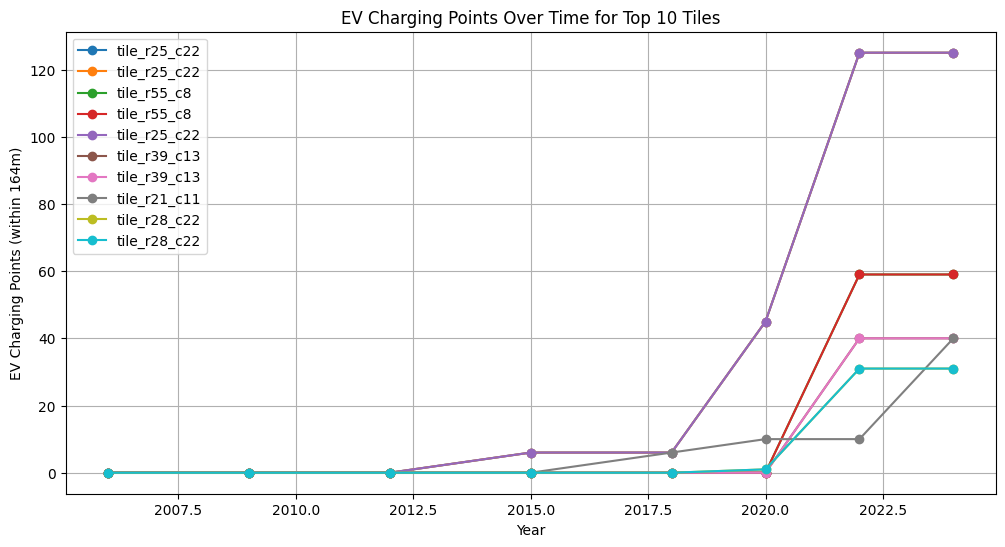

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for tile in top_tiles_points:
    tile_data = top_tiles_df[top_tiles_df["tile"] == tile].sort_values("year")
    plt.plot(
        tile_data["year"],
        tile_data["ev_points_164m"],
        marker='o',
        label=tile
    )

plt.xlabel("Year")
plt.ylabel("EV Charging Points (within 164m)")
plt.title("EV Charging Points Over Time for Top 10 Tiles")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
output_path = "/home/elsherif/Desktop/Thesis/ViewPython/data/CleanupDataSet/final_model_ev_updated.csv"

df_dataset.to_csv(output_path, index=False)

print(f"Dataset exported to: {output_path}")


Dataset exported to: /home/elsherif/Desktop/Thesis/ViewPython/data/CleanupDataSet/final_model_ev_updated.csv
